# 股票收盤價日線資料探索
我們今天的筆記本討論一下怎麼用pandas與matplotlib對資料做基本的探索，然後我們嘗試用簡單的方法估計持有股票的風險程度。

對於一個投資者來說，了解股票投資的風險度應該是很重要的，這就是，我們想要估計我們股票的價格的波動程度，但是如果昨天價格的統計性質與今天價格的統計性質有很大的不一樣，我們就沒有辦法合理評估今天價格的波動程度。

## 讀入資料
首先，我們第一步先讀入資料，我們使用上次學到的指令讀入我們建好的資料庫

In [2]:
# 載入套件庫並讀入資料
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3
import numpy as np

In [3]:
db = sqlite3.connect('TWStock_2')
#這邊我們挑選一些台灣的代表性股票
stocks_dict = {}
#台積電2330
stocks_dict.update({'tsmc':pd.read_sql(con=db,sql='SELECT * FROM "2330"')})
#台塑化6505
stocks_dict.update({'fpc':pd.read_sql(con=db,sql='SELECT * FROM "6505"')})
#鴻海2317
stocks_dict.update({'foxconn':pd.read_sql(con=db,sql='SELECT * FROM "2317"')})
#中華電2412
stocks_dict.update({'cht':pd.read_sql(con=db,sql='SELECT * FROM "2412"')})
#台塑1301
stocks_dict.update({'fpg':pd.read_sql(con=db,sql='SELECT * FROM "1301"')})
#台化1326
stocks_dict.update({'fcfc':pd.read_sql(con=db,sql='SELECT * FROM "1326"')})
#國泰金2882
stocks_dict.update({'cfh':pd.read_sql(con=db,sql='SELECT * FROM "2882"')})
#南亞1303
stocks_dict.update({'ny':pd.read_sql(con=db,sql='SELECT * FROM "1303"')})
#富邦金2881
stocks_dict.update({'fubon':pd.read_sql(con=db,sql='SELECT * FROM "2881"')})
#大立光3008
stocks_dict.update({'largan':pd.read_sql(con=db,sql='SELECT * FROM "3008"')})

## 繪製基本股價走勢圖
我們在這邊先繪製這幾隻股票的收盤價的走勢圖

In [5]:
stocks_dict['largan'].head()

,index,證券名稱,成交股數,成交筆數,成交金額,開盤價,最高價,最低價,收盤價,漲跌(+/-),漲跌價差,最後揭示買價,最後揭示買量,最後揭示賣價,最後揭示賣量,本益比,Date
0,533,大立光,"1,457,090","1,429","3,106,972,100","2,080.00","2,190.00","2,065.00","2,190.00",+,140.0,"2,190.00",122,--,0,27.30,2014-06-19 00:00:00
1,533,大立光,"894,834",870,"1,958,926,460","2,190.00","2,205.00","2,175.00","2,185.00",-,5.0,"2,185.00",38,"2,190.00",7,27.24,2014-06-20 00:00:00
2,533,大立光,"1,237,323","1,241","2,800,493,365","2,205.00","2,310.00","2,190.00","2,255.00",+,70.0,"2,255.00",31,"2,260.00",11,28.11,2014-06-23 00:00:00
3,533,大立光,"886,208",908,"1,983,645,720","2,260.00","2,285.00","2,195.00","2,210.00",-,45.0,"2,205.00",6,"2,210.00",20,27.55,2014-06-24 00:00:00
4,533,大立光,"657,151",646,"1,455,715,975","2,190.00","2,245.00","2,180.00","2,220.00",+,10.0,"2,220.00",1,"2,225.00",10,27.67,2014-06-25 00:00:00


In [6]:
df_test = stocks_dict['largan'].copy()

In [9]:
df_test.index = pd.to_datetime(df_test['Date'])

In [11]:
df_test = df_test[['證券名稱','收盤價']]

In [13]:
df_test['收盤價'] = df_test['收盤價'].apply(lambda x:x.replace(',',''))

In [15]:
df_test['收盤價'] = pd.to_numeric(df_test['收盤價'])

In [17]:
df_test.columns = ['stock_code','close']

In [18]:
df_test.head()

,stock_code,close
Date,,
2014-06-19,大立光,2190.0
2014-06-20,大立光,2185.0
2014-06-23,大立光,2255.0
2014-06-24,大立光,2210.0
2014-06-25,大立光,2220.0


In [19]:
'''
在畫圖之前，
我們先整理我們的資料，將每個股票整理成股票名稱與收盤價的表格形式，
其中，因為收盤價被存為字串形式，我們也必須轉為數值形式做進一個的運算
'''
for key in stocks_dict.keys():
    df = stocks_dict[key]
    df.index = df['Date']
    df.index = pd.to_datetime(df.index)
    df = df[['證券名稱','收盤價']]
    df['收盤價'] = pd.to_numeric(df['收盤價'].apply(lambda x:x.replace(',','')),errors='coerce')
    df.columns = ['stock_code','close']
    stocks_dict[key] = df

/home/qin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


In [20]:
stocks_dict['tsmc'].head()

,stock_code,close
Date,,
2014-06-19,台積電,126.0
2014-06-20,台積電,124.5
2014-06-23,台積電,123.0
2014-06-24,台積電,123.0
2014-06-25,台積電,123.5


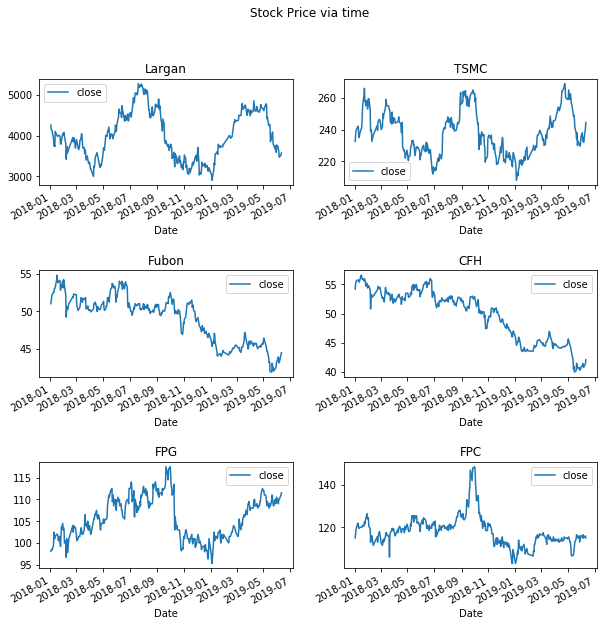

In [21]:
fig,ax = plt.subplots(3,2,figsize=(10,10))
plt.subplots_adjust(hspace=0.8)
stocks_dict['largan']['2018-01-01':].plot(ax=ax[0,0])
ax[0,0].set_title('Largan')
stocks_dict['tsmc']['2018-01-01':].plot(ax=ax[0,1])
ax[0,1].set_title('TSMC')
stocks_dict['fubon']['2018-01-01':].plot(ax=ax[1,0])
ax[1,0].set_title('Fubon')
stocks_dict['cfh']['2018-01-01':].plot(ax=ax[1,1])
ax[1,1].set_title('CFH')
stocks_dict['fpg']['2018-01-01':].plot(ax=ax[2,0])
ax[2,0].set_title('FPG')
stocks_dict['fpc']['2018-01-01':].plot(ax=ax[2,1])
ax[2,1].set_title('FPC')
fig.suptitle('Stock Price via time')
plt.show()

## 圖像判斷法
如果我們要用最簡單的方式來估計我們持有股票的風險度的話，應該就是去估計股票的波動程度了，而我們可以選擇用標準差這個最常見的方式來測量波動程度。但是問題是，如果昨天的股票的統計性質與明天的股票的統計性質相差很大的話，我們就很難相信我們用過去股價估計出來的波動程度可以有效的衡量明天股價的波動程度，也就是說，我們希望我們前後天的股價是獨立且有相似的分配的，我們這邊可以用很簡單的圖像方式來呈現前後天股價的關係。

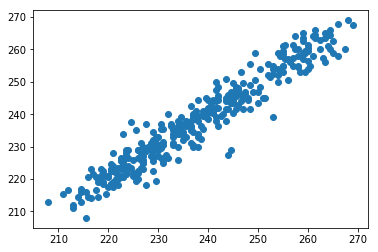

([array([ 3.,  8., 23., 27., 12., 38., 27., 14.,  9.,  2.]),
  array([ 3., 17., 31., 28., 33., 16., 11., 11., 22., 14.])],
 array([208. , 214.1, 220.2, 226.3, 232.4, 238.5, 244.6, 250.7, 256.8,
        262.9, 269. ]),
 <a list of 2 Lists of Patches objects>)

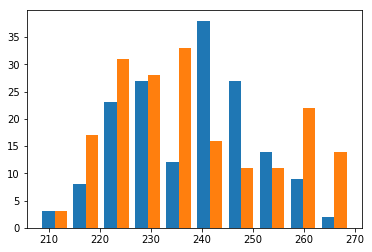

In [24]:
#用TSMC做例子
df = stocks_dict['tsmc'].copy()
df_p = df['2018-01-01':].iloc[:-1,:]
df_a = df['2018-01-01':].iloc[1:,:]
plt.scatter(np.array(df_p['close']),np.array(df_a['close']))
plt.show()
plt.hist([np.array(df['2018-01-01':'2018-09-01']['close']),np.array(df['2018-09-01':]['close'])])

可以發現，前一期的股價與一期的股價並非沒有關係，可以看到兩者之間有正向關係。讓我們想想辦法，我們不直接計算股價，而是計算兩個不同的報酬率
- 線性報酬率:
$$ r^{L}_t = \frac{P_t}{P_{t-1}} - 1$$
- 連續報酬率:
$$r^{c}_t = ln(\frac{P_t}{P_{t-1}})$$
我們來計算線性報酬率吧

In [25]:
df = df['2018-01-01':]
df.head()

,stock_code,close
Date,,
2018-01-02,台積電,232.5
2018-01-03,台積電,237.0
2018-01-04,台積電,239.5
2018-01-05,台積電,240.0
2018-01-08,台積電,242.0


In [26]:
df['linear return rate'] = df['close'].pct_change()

In [27]:
df.head()

,stock_code,close,linear return rate
Date,,,
2018-01-02,台積電,232.5,NaN
2018-01-03,台積電,237.0,0.019355
2018-01-04,台積電,239.5,0.010549
2018-01-05,台積電,240.0,0.002088
2018-01-08,台積電,242.0,0.008333


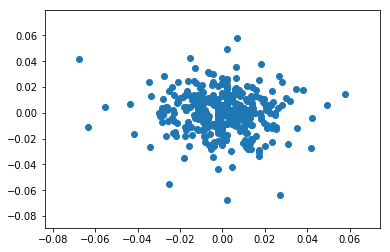

In [28]:
df_lrp = df.iloc[:-1,:]
df_lra = df.iloc[1:,:]
plt.scatter(np.array(df_lrp['linear return rate']),np.array(df_lra['linear return rate']))
plt.show()

可以發現，當我們做報酬率的轉換後，其前後期關係更接近於獨立關係，我們可以更有信心估計報酬率波動程度。而當前後期股價接近時，根據泰勒展開式，我們支到線性報酬率與連續報酬率的值近似。所以我們可以用以下的統計模型
$$ ln(\frac{P_t}{P_{t-1}})  \sim  N(\mu, \sigma^2) $$
則我們可以利用一些常見的方法(e.g. MLE)去估計參數，進而得到我們對於報酬的分配估計，而在這種情況下我們就可以評估我們的風險水準了！！